In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

##Helper functions. Use when needed

In [0]:
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(2, 5, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

# Calculating Precision, Recall and F1 Score
  
def report(ytest,ypred):
  mat = confusion_matrix(y_pred,y_test)
  for i in range(mat.shape[0]):
    counter1 = 0
    counter2 = 0
    print('Class:',i,end=" ")
    precision = mat[i,i]/np.sum(mat,axis=1)[i]
    print('Precision:',"{0:.2f}".format(precision),end = " ")
    recall = mat[i,i]/np.sum(mat,axis=0)[i]
    print('Recall:',"{0:.2f}".format(recall),end=" ")     
    fscore = 2*precision*recall/(precision+recall)
    print('F1=Score:',"{0:.2f}".format(fscore))

# Step1: Dataset Read

In [111]:
#Read dataset. The dataset given is already flattened.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/face_data.csv')

targets = df["target"]
pixels = df.drop(["target"], axis=1)

X = pixels.values
Y = targets.values

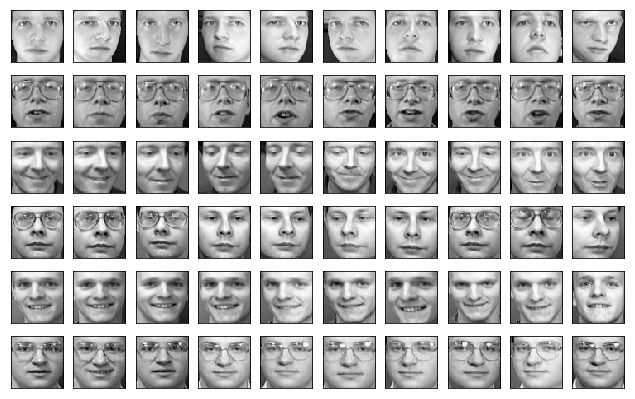

In [113]:
#Printing original images of first six persons

show_orignal_images(X)

## Step 2: Split Dataset into training and testing


In [114]:
print(X.shape)
print(Y.shape)

(400, 4096)
(400,)


In [115]:
for i in range(40):
  X_traini, X_testi, y_traini, y_testi = train_test_split(
      X[np.random.permutation(range(10*i,10*i+10))], Y[np.random.permutation(range(10*i,10*i+10))], test_size=0.3, random_state=7)
  if(i==0): 
    X_train = X_traini
    X_test = X_testi
    y_test = y_testi
    y_train = y_traini
  else:  
    X_train = np.vstack((X_train,X_traini))
    X_test = np.vstack((X_test,X_testi))
    y_train = np.hstack((y_train,y_traini))
    y_test = np.hstack((y_test,y_testi))
print(y_train)
print(y_test)

[ 0  0  0  0  0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6
  6  7  7  7  7  7  7  7  8  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10
 10 10 10 10 10 11 11 11 11 11 11 11 12 12 12 12 12 12 12 13 13 13 13 13
 13 13 14 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 17
 17 17 17 17 17 17 18 18 18 18 18 18 18 19 19 19 19 19 19 19 20 20 20 20
 20 20 20 21 21 21 21 21 21 21 22 22 22 22 22 22 22 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 25 25 25 25 25 25 25 26 26 26 26 26 26 26 27 27 27
 27 27 27 27 28 28 28 28 28 28 28 29 29 29 29 29 29 29 30 30 30 30 30 30
 30 31 31 31 31 31 31 31 32 32 32 32 32 32 32 33 33 33 33 33 33 33 34 34
 34 34 34 34 34 35 35 35 35 35 35 35 36 36 36 36 36 36 36 37 37 37 37 37
 37 37 38 38 38 38 38 38 38 39 39 39 39 39 39 39]
[ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15
 

(4096,)


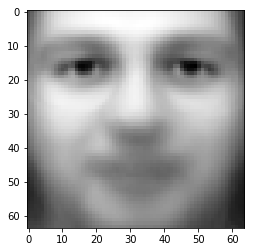

In [116]:
mean_face = np.mean(X_train,axis=0)
print(mean_face.shape)
plt.imshow(np.reshape(mean_face,(64,64)),cmap='gray')

## Step 3: Perform PCA.

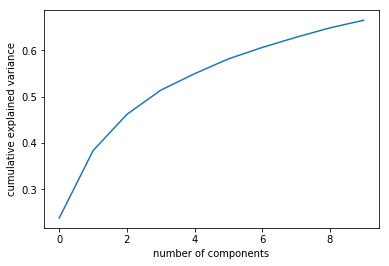

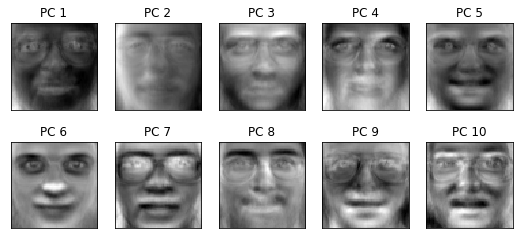

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10).fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

show_eigenfaces(pca)

##Step4 : Project Training data to PCA


In [0]:
#Projecting the input data on the eigenfaces orthonormal basis

Xtrain_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)

## Step 5: Initialize Classifer and fit training data

In [119]:
# K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(Xtrain_pca, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
# Decision tree classifier

from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(Xtrain_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [121]:
# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain_pca, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Step 6: Perform testing and get classification report


In [122]:
print("K-Nearest Neighbour::")

y_pred_neigh = neigh.predict(Xtest_pca)
print(classification_report(y_test, y_pred_neigh))

K-Nearest Neighbour::
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         3
           3       0.33      0.67      0.44         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.50      0.33      0.40         3
           7       1.00      1.00      1.00         3
           8       0.75      1.00      0.86         3
           9       0.67      0.67      0.67         3
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         3
          14       0.38      1.00      0.55         3
          15       0.33      0.33      0.33         3
          16       0.50      0.67      0.57         3
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [123]:
print("Decision tree Classifier::")

y_pred_dtc = dtc.predict(Xtest_pca)
print(classification_report(y_test, y_pred_dtc))

Decision tree Classifier::
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.06      1.00      0.12         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.09      1.00      0.16         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
print("Naive Bayes Classifier")
y_pred_gnb = gnb.predict(Xtest_pca)
print(classification_report(y_test, y_pred_gnb))

Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         3
           3       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.50      0.67      0.57         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       0.33      0.33      0.33         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       0.29      0.67      0.40         3
          16       0.75      1.00      0.86         3
    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
